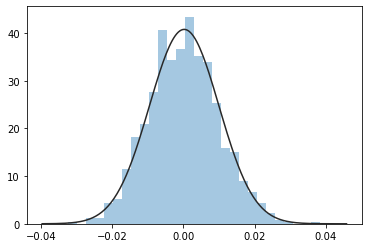

In [3]:
import pandas as pd
import seaborn as sns

#Generate random numbers

#To generate the random numbers
from numpy.random import normal,seed

#Compare the normal distribution alonside the random sample
from scipy.stats import norm

seed(42)
random_returns = normal(loc=0, scale=0.01, size=1000)
sns.distplot(random_returns, fit=norm, kde=False)

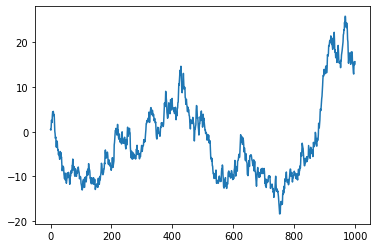

In [4]:
#Create a random price path

return_series = pd.Series(random_returns)

random_prices = return_series.add(1).cumprod().sub(1)

random_prices.mul(100).plot()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E39088EEB0>,
      dtype=object)

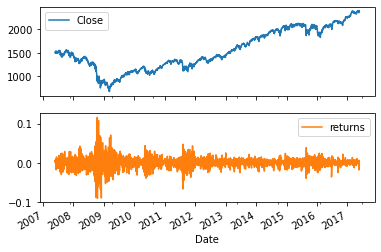

In [6]:
#simulate the SP500

data = pd.read_csv('sp500.csv', parse_dates=[0], index_col='Date')
data =data.drop(columns=['Open','High','Low','Adj Close','Volume'])
data['returns']=data.Close.pct_change()
data.plot(subplots=True)

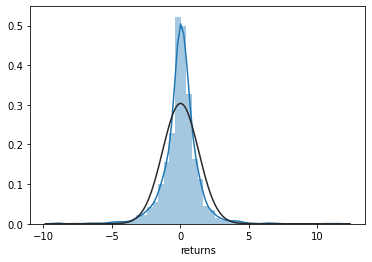

In [7]:
#Compare the SP500 and normal distribution

sns.distplot(data.returns.dropna().mul(100),fit=norm)

In [10]:
#Randomly select from the SP500 returns

from numpy.random import choice

sample=data.returns.dropna()

n_obs = data.returns.count()

#Return a numpy arrary with a random sample from the SP500 returns
random_walk = choice(sample,size=n_obs)

#Convert the array to a pd.Series
random_walk = pd.Series(random_walk,index=sample.index)

random_walk.head()

Date
2007-05-25   -0.018743
2007-05-29    0.020284
2007-05-30   -0.003193
2007-05-31    0.007886
2007-06-01    0.004840
dtype: float64

In [12]:
#Use the first method with the calendar day offset to find the first price
start = data.Close.first('D')
start

Date
2007-05-24    1507.51001
Name: Close, dtype: float64

In [13]:
#Add to the random returns and add
sp500_random = start.append(random_walk.add(1))
sp500_random.head()

Date
2007-05-24    1507.510010
2007-05-25       0.981257
2007-05-29       1.020284
2007-05-30       0.996807
2007-05-31       1.007886
dtype: float64

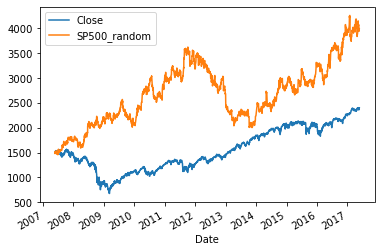

In [14]:
data['SP500_random']= sp500_random.cumprod()
data[['Close','SP500_random']].plot()